### Conservation of momentum
The conservation of momentum in a rotating atmosphere can be written as

$$
\dfrac{ \partial \overline{u}}{\partial t}
= 
f \left( \overline{v} - v_g \right)
- \dfrac{\partial \overline{w^\prime u^\prime}}{\partial z}
\\
\dfrac{ \partial \overline{v}}{\partial t}
=
- f \left( \overline{u} - u_g \right)
- \dfrac{\partial \overline{w^\prime v^\prime}}{\partial z}
$$

It is common to parameterize the vertical transport by turbulence as

$$
\overline{w^\prime u^\prime} = - K \dfrac{\partial \overline{u}}{\partial z}
\\
\overline{w^\prime v^\prime} = - K \dfrac{\partial \overline{v}}{\partial z}
$$
___

### Steady state solutions
Steady state solutions of this equation fulfill the equalities

$$
f \overline{v}
+ \dfrac{\partial}{\partial z} \left( K \dfrac{ \partial \overline{u}}{\partial z} \right)
=
f v_g
\\
- f \overline{u}
+ \dfrac{\partial}{\partial z} \left( K \dfrac{ \partial \overline{v}}{\partial z} \right)
=
- f u_g
$$

This set of equations can be solved with a single matrix inversion.

In [1]:
# Loading the required Python packages.
import numpy as np
import pylab as pl
%matplotlib inline

In [2]:
# Defining a solver.
def solve_wind(K, f, ug, vg):
    M = np.zeros((2*n,2*n))
    v = np.zeros(2*n)

    M[0,0] += 1.
    M[n,n] += 1.
    v[0] += 0.
    v[n] += 0.
    
    # Set the diffusion in the matrix.
    for i in range(1, n-1):
        for j in range(2):
            ii = i+j*n
            M[ii,ii-1] += K[i-1]/dz**2
            M[ii,ii  ] += -(K[i-1] + K[i])/dz**2
            M[ii,ii+1] += K[i]/dz**2
            
    # Set the coriolis force and pressure gradient in the matrix.
    for i in range(1, n-1):
        ii = i+n
        M[i,ii] += f
        M[ii,i] -= f
        v[i ] += f*vg
        v[ii] -= f*ug
    
    # Dirichlet BC at top (u = ug, v = vg)
    #M[n-1  ,n-1  ] += 1.
    #M[2*n-1,2*n-1] += 1.
    #v[n-1  ] += ug
    #v[2*n-1] += vg
    
    # Neumann BC at top (free slip, no gradient)
    M[n-1  ,n-2  ] -= 1.
    M[n-1  ,n-1  ] += 1.
    M[2*n-1,2*n-2] -= 1.
    M[2*n-1,2*n-1] += 1. 
    
    sol = np.linalg.solve(M,v)
    return sol[:n], sol[n:]

In [3]:
# Defining the plot function.
def plot_results(u, v, K, f, ug, vg, ref=False):
    gammaz = (f/(2.*K.mean()))**.5*z
    u_ref = ug * (1. - np.exp(-gammaz)*np.cos(gammaz))
    v_ref = ug * np.exp(-gammaz)*np.sin(gammaz)
    
    uw = -K * (u[1:] - u[:-1]) / dz
    vw = -K * (v[1:] - v[:-1]) / dz
    
    pl.figure(figsize=(8,6))
    pl.subplot(221)
    pl.plot(u, z, 'k-', label='u')
    pl.plot(v, z, 'r-', label='v')
    if (ref):
        pl.plot(u_ref, z, 'k:')
        pl.plot(v_ref, z, 'r:')
    pl.legend(loc=0, frameon=False)
    pl.xlabel('v (m/s)')
    pl.ylabel('z (m)')
    
    pl.subplot(222)
    pl.plot(uw, z_flux, 'k-', label='uw')
    pl.plot(vw, z_flux, 'r-', label='vw')
    pl.legend(loc=0, frameon=False)
    pl.xlabel('uw (m2/s2)')
    pl.ylabel('z (m)')
    
    pl.subplot(223)
    pl.plot(u, v, 'k-')
    if (ref):
        pl.plot(u_ref, v_ref, 'k:')
    pl.xlabel('u (m/s)')
    pl.ylabel('v (m/s)')
    
    pl.subplot(224)
    pl.plot(K, z_flux, 'k-')
    pl.xlabel('K (m2/s)')
    pl.ylabel('z (m)')
    
    pl.tight_layout()

___
### The Ekman spiral 
The Ekman spiral below has constant diffusivity.

In [4]:
# Setting up the grid.
n = 2048
z_bot = 0.
z_top = 3500.
z = np.linspace(z_bot, z_top, n)
z_flux = 0.5*(z[:-1]+z[1:])
dz = z[2]-z[1]

alpha = 44.902
cross isobaric flow = 2500.008 m2/s


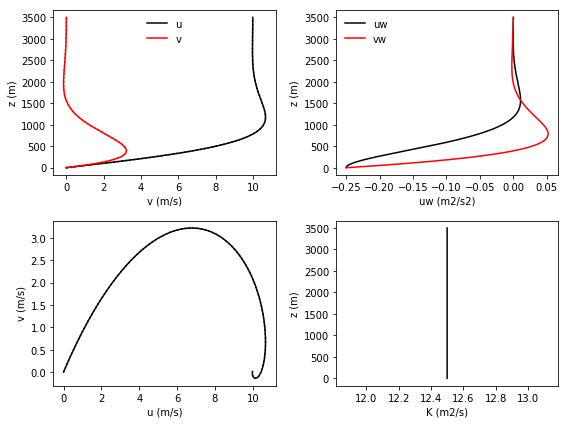

In [5]:
# Constant K.
f = 1e-4
ug = 10.
vg = 0.

shape = np.ones(n-1)
K_mean = 12.5

K = K_mean*shape

u, v = solve_wind(K, f, ug, vg)
plot_results(u, v, K, f, ug, vg, True)

alpha = np.arctan(v[1]/u[1])
print("alpha = {0:.3f}".format(np.rad2deg(alpha)))
print("cross isobaric flow = {0:.3f} m2/s".format(np.sum(v)*dz))

alpha = 15.904
cross isobaric flow = 140.539 m2/s


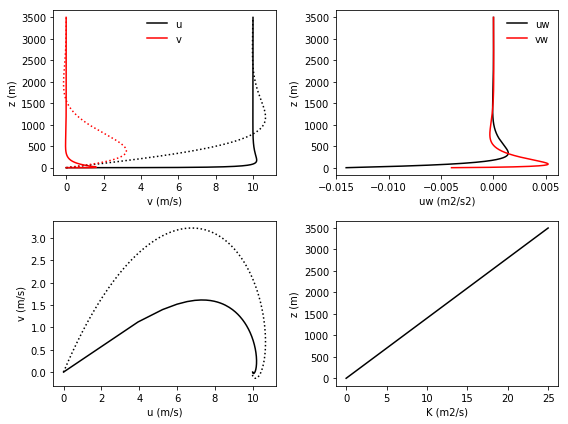

In [12]:
# custom K.
f = 1e-4
ug = 10.
vg = 0.

kappa = 0.4
ustar = 0.5

shape = z_flux**1.
shape /= shape.mean()

K_mean = 12.5
K = K_mean * shape

u, v = solve_wind(K, f, ug, vg)
plot_results(u, v, K, f, ug, vg, True)

alpha = np.arctan(v[1]/u[1])
print("alpha = {0:.3f}".format(np.rad2deg(alpha)))
print("cross isobaric flow = {0:.3f} m2/s".format(np.sum(v)*dz))

alpha = 13.900
cross isobaric flow = 633.937 m2/s


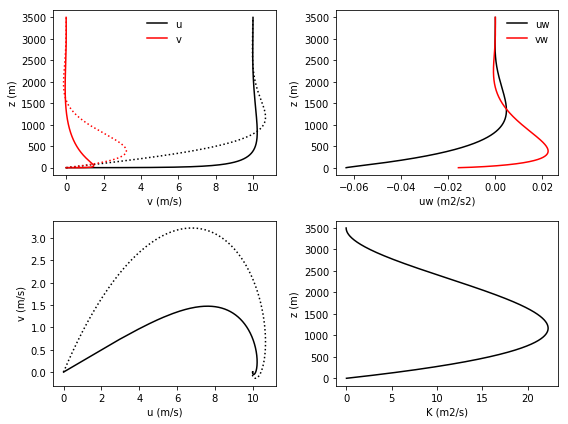

In [8]:
# custom K.
f = 1e-4
ug = 10.
vg = 0.

kappa = 0.4
ustar = 0.5

shape = z_flux * (1. - z_flux/z_flux[-1])**2
shape /= shape.mean()

K_mean = 12.5
K = K_mean * shape

u, v = solve_wind(K, f, ug, vg)
plot_results(u, v, K, f, ug, vg, True)

alpha = np.arctan(v[1]/u[1])
print("alpha = {0:.3f}".format(np.rad2deg(alpha)))
print("cross isobaric flow = {0:.3f} m2/s".format(np.sum(v)*dz))

alpha = 13.993
cross isobaric flow = 440.337 m2/s


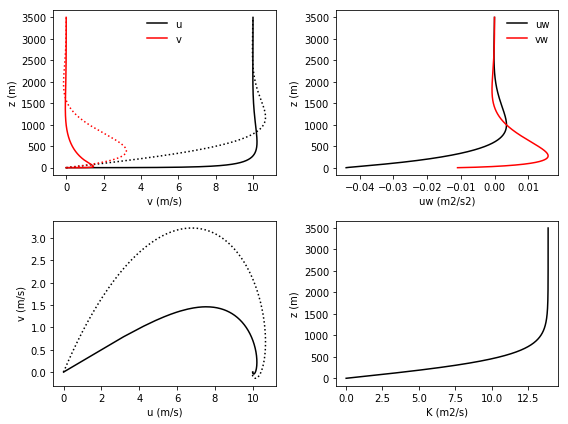

In [9]:
# custom K.
f = 1e-4
ug = 10.
vg = 0.

kappa = 0.4
ustar = 0.5

c = 500.
shape = np.tanh(z_flux/c)
shape /= shape.mean()

K_mean = 12.5
K = K_mean * shape

u, v = solve_wind(K, f, ug, vg)
plot_results(u, v, K, f, ug, vg, True)

alpha = np.arctan(v[1]/u[1])
print("alpha = {0:.3f}".format(np.rad2deg(alpha)))
print("cross isobaric flow = {0:.3f} m2/s".format(np.sum(v)*dz))